Name : Prashant Gupta <br>
Roll Number : 2020102030

In [1]:
from nilearn import datasets

In [2]:
dataset = datasets.fetch_miyawaki2008()

# Training the dataset with Alphabets and Shapes

In [3]:
X_train_filenames = dataset.func[0:12:]
X_alphabets_filenames = dataset.func[4:12]
X_shapes_filenames = dataset.func[0:4]
y_train_filenames = dataset.label[0:12:]
y_alphabets_filenames = dataset.label[4:12]
y_shapes_filenames = dataset.label[0:4]

In [4]:
y_shape = (10, 10)

In [5]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker

masker = MultiNiftiMasker(mask_img=dataset.mask, detrend=True,
                          standardize=False)
masker.fit()
X_train = masker.transform(X_train_filenames)
X_test_alphabets = masker.transform(X_alphabets_filenames)
X_test_shapes = masker.transform(X_shapes_filenames)

In [6]:
y_train = []
for y in y_train_filenames:
    y_train.append(np.reshape(np.loadtxt(y, dtype=int, delimiter=','),
                              (-1,) + y_shape, order='F'))

y_test_alphabets = []
for y in y_alphabets_filenames:
    y_test_alphabets.append(np.reshape(np.loadtxt(y, dtype=int, delimiter=','),
                             (-1,) + y_shape, order='F'))
    

y_test_shapes = []
for y in y_shapes_filenames:
    y_test_shapes.append(np.reshape(np.loadtxt(y, dtype=int, delimiter=','),
                             (-1,) + y_shape, order='F'))
    


X_train = np.vstack([x[2:] for x in X_train])
X_test_alphabets = np.vstack([x[2:] for x in X_test_alphabets])
X_test_shapes = np.vstack([x[2:] for x in X_test_shapes])

y_train = np.vstack([y[:-2] for y in y_train]).astype(float)
y_test_shapes = np.vstack([y[:-2] for y in y_test_shapes]).astype(float)
y_test_alphabets = np.vstack([y[:-2] for y in y_test_alphabets]).astype(float)

In [7]:
def flatten(list_of_2d_array):
    flattened = []
    for array in list_of_2d_array:
        flattened.append(array.ravel())
    return flattened

y_train = np.asarray(flatten(y_train))
y_test_shapes = np.asarray(flatten(y_test_shapes))
y_test_alphabets = np.asarray(flatten(y_test_alphabets))

In [8]:
X_train = X_train[y_train[:, 0] != -1]
y_train = y_train[y_train[:, 0] != -1]

X_test_alphabets = X_test_alphabets[y_test_alphabets[:, 0] != -1]
y_test_alphabets = y_test_alphabets[y_test_alphabets[:, 0] != -1]

X_test_shapes = X_test_shapes[y_test_shapes[:, 0] != -1]
y_test_shapes = y_test_shapes[y_test_shapes[:, 0] != -1]

In [9]:
# OMP: Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create as many OMP as voxels to predict
clfs = []
n_clfs = y_train.shape[1]
for i in range(y_train.shape[1]):

    clf = Pipeline([('selection', SelectKBest(f_classif, k=500)),
                    ('scl', StandardScaler()),
                    ('clf', LinearSVC(penalty='l1', C=0.01, dual=False))])
    if(np.max(y_train[:,i]) == 0):
        y_train[:,i][0] = 1.0
    clf.fit(X_train, y_train[:, i])
    clfs.append(clf)

In [10]:
y_pred = []
for clf in clfs:
    y_pred.append(clf.predict(X_test_alphabets))
y_pred = np.asarray(y_pred).T

In [11]:
from sklearn.metrics import accuracy_score

print("Accuracy (percent): %f" % np.mean([
    accuracy_score(y_test_alphabets[:, i], y_pred[:, i] > .5) for i in range(100)]))

Accuracy (percent): 0.972271


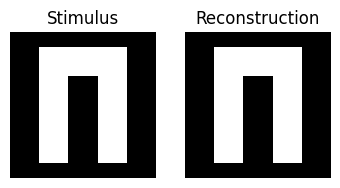

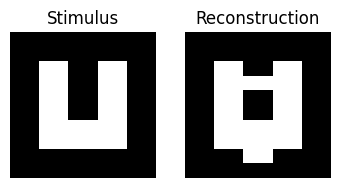

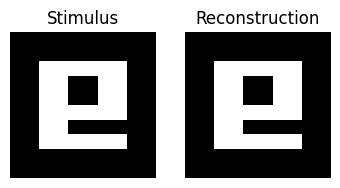

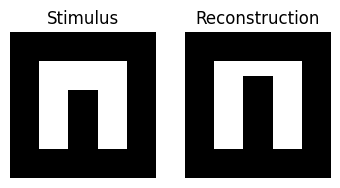

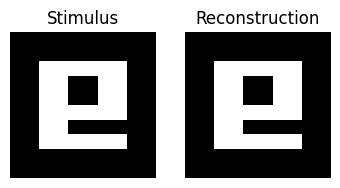

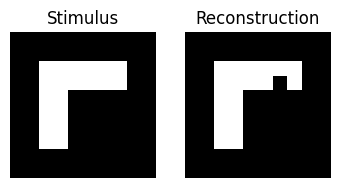

In [12]:
from matplotlib import pyplot as plt
from nilearn.plotting import show

for i in range(6):
    j = int((200*np.random.rand(1)))
    fig = plt.figure()
    sp1 = plt.subplot(131)
    sp1.axis('off')
    plt.title('Stimulus')
    sp2 = plt.subplot(132)
    sp2.axis('off')
    plt.title('Reconstruction')
    #sp3 = plt.subplot(133)
    #sp3.axis('off')
    #plt.title('Binarized')
    sp1.imshow(np.reshape(y_test_alphabets[j], (10, 10)), cmap=plt.cm.gray,
               interpolation='nearest'),
    sp2.imshow(np.reshape(y_pred[j], (10, 10)), cmap=plt.cm.gray,
               interpolation='nearest'),
    #sp3.imshow(np.reshape(y_pred[j] > .5, (10, 10)), cmap=plt.cm.gray,
    #           interpolation='nearest')
    #plt.savefig('miyawaki2008_reconstruction_%d' % i)

show()

In [13]:
y_pred = []
for clf in clfs:
    y_pred.append(clf.predict(X_test_shapes))
y_pred = np.asarray(y_pred).T

In [14]:
from sklearn.metrics import accuracy_score

print("Accuracy (percent): %f" % np.mean([
    accuracy_score(y_test_shapes[:, i], y_pred[:, i] > .5) for i in range(100)]))

Accuracy (percent): 0.972542


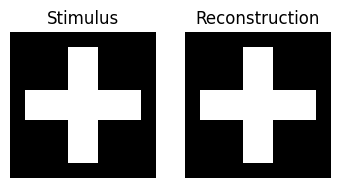

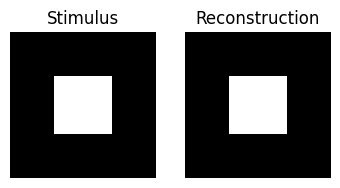

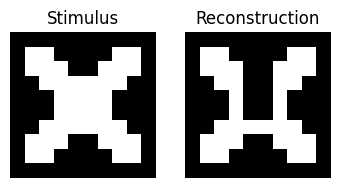

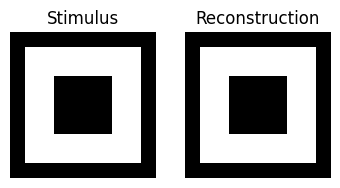

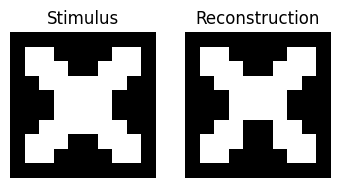

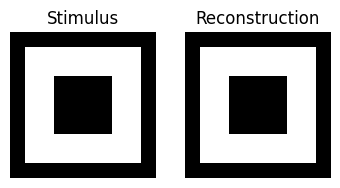

In [15]:
from matplotlib import pyplot as plt
from nilearn.plotting import show

for i in range(6):
    j = int((200*np.random.rand(1)))
    fig = plt.figure()
    sp1 = plt.subplot(131)
    sp1.axis('off')
    plt.title('Stimulus')
    sp2 = plt.subplot(132)
    sp2.axis('off')
    plt.title('Reconstruction')
    #sp3 = plt.subplot(133)
    #sp3.axis('off')
    #plt.title('Binarized')
    sp1.imshow(np.reshape(y_test_shapes[j], (10, 10)), cmap=plt.cm.gray,
               interpolation='nearest'),
    sp2.imshow(np.reshape(y_pred[j], (10, 10)), cmap=plt.cm.gray,
               interpolation='nearest'),
    #sp3.imshow(np.reshape(y_pred[j] > .5, (10, 10)), cmap=plt.cm.gray,
    #           interpolation='nearest')
    #plt.savefig('miyawaki2008_reconstruction_%d' % i)

show()

In [16]:
# OMP: Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create as many OMP as voxels to predict
clfs = []
n_clfs = y_train.shape[1]
for i in range(y_train.shape[1]):

    clf = Pipeline([('selection', SelectKBest(f_classif, k=5438)),
                    ('scl', StandardScaler()),
                    ('clf', LinearSVC(penalty='l1', C=0.01, dual=False))])
    if(np.max(y_train[:,i]) == 0):
        y_train[:,i][0] = 1.0
    clf.fit(X_train, y_train[:, i])
    clfs.append(clf)

# Visualising The Brain Weights

In [17]:
brain_weights = masker.inverse_transform(clfs[42].named_steps['clf'].coef_)

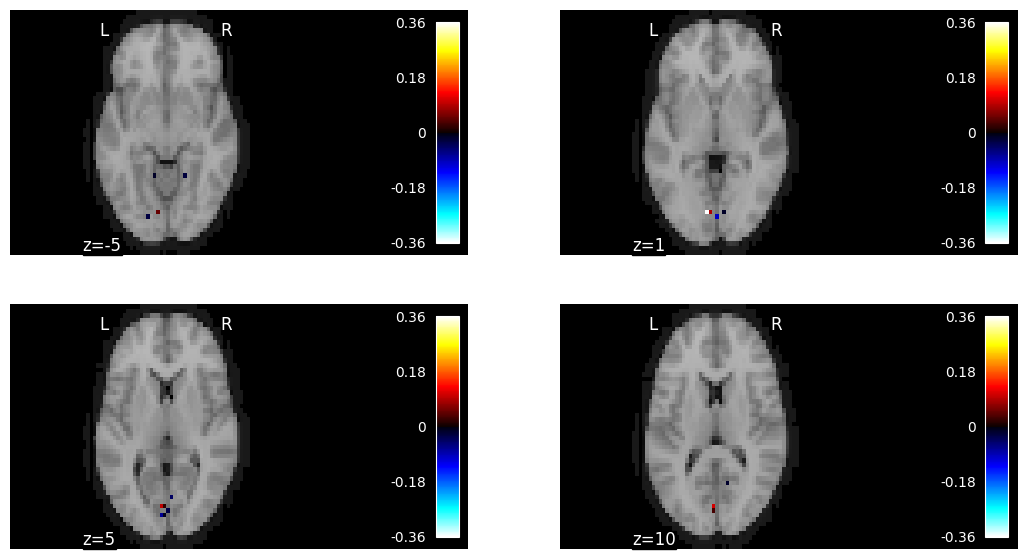

In [18]:
from nilearn.plotting import plot_stat_map

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 7))


display = plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[-5], display_mode='z', aspect=1.25,axes=axs[0][0])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[1], display_mode='z', aspect=1.25,axes=axs[0][1])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[5], display_mode='z', aspect=1.25,axes=axs[1][0])


plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[10], display_mode='z', aspect=1.25,axes=axs[1][1])


In [19]:
brain_weights = masker.inverse_transform(clfs[53].named_steps['clf'].coef_)

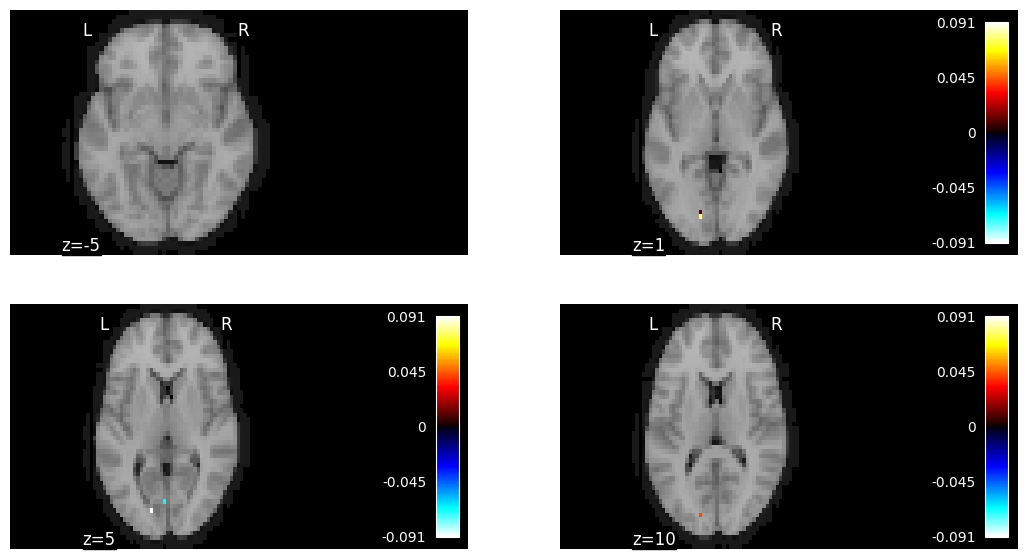

In [20]:
from nilearn.plotting import plot_stat_map

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 7))


display = plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[-5], display_mode='z', aspect=1.25,axes=axs[0][0])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[1], display_mode='z', aspect=1.25,axes=axs[0][1])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[5], display_mode='z', aspect=1.25,axes=axs[1][0])


plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[10], display_mode='z', aspect=1.25,axes=axs[1][1])


In [21]:
brain_weights = masker.inverse_transform(clfs[14].named_steps['clf'].coef_)

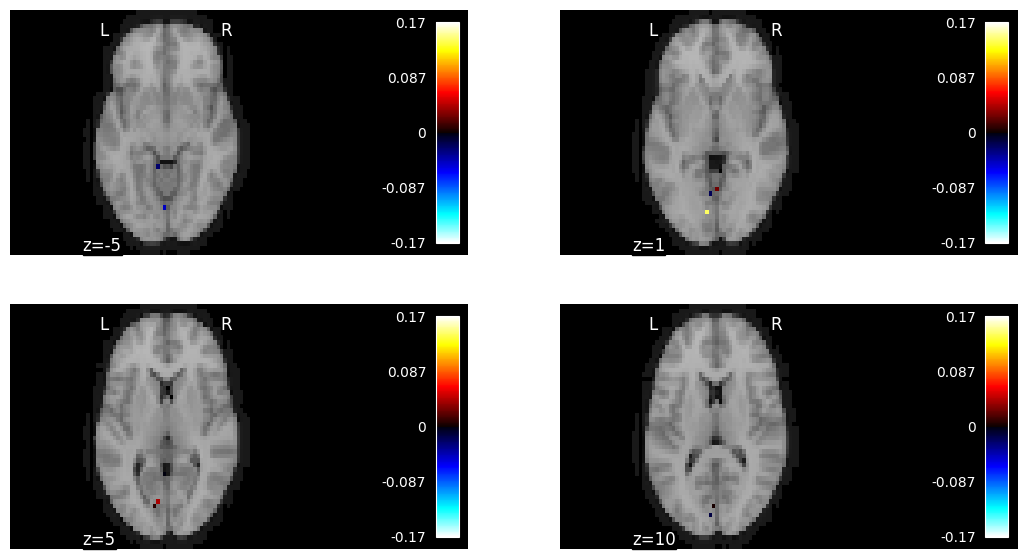

In [22]:
from nilearn.plotting import plot_stat_map

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 7))


display = plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[-5], display_mode='z', aspect=1.25,axes=axs[0][0])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[1], display_mode='z', aspect=1.25,axes=axs[0][1])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[5], display_mode='z', aspect=1.25,axes=axs[1][0])


plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[10], display_mode='z', aspect=1.25,axes=axs[1][1])


In [23]:
temp = clfs[0].named_steps['clf'].coef_.copy()

In [24]:
for i in range(1,100):
    temp += clfs[i].named_steps['clf'].coef_

In [25]:
brain_weights = masker.inverse_transform(temp)

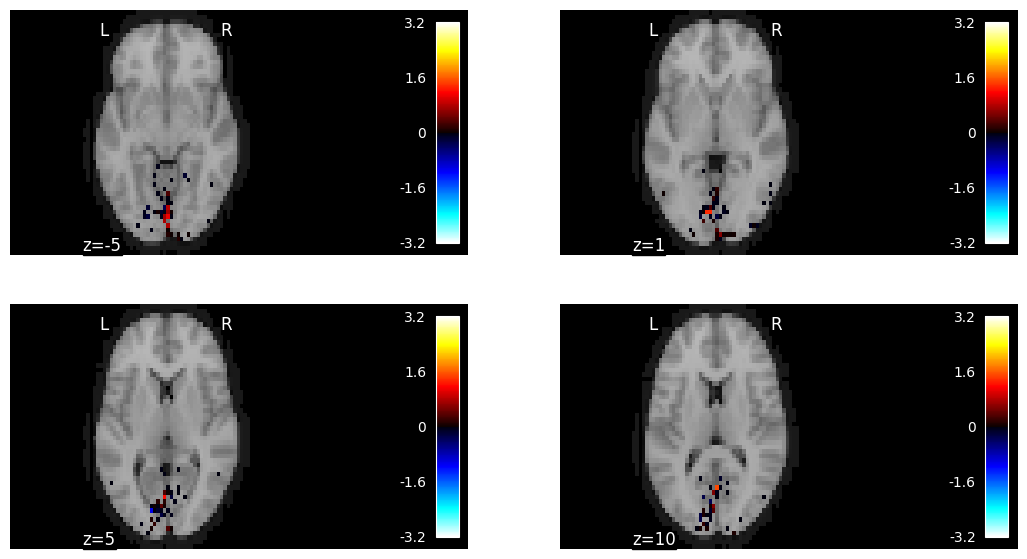

In [26]:
from nilearn.plotting import plot_stat_map

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 7))


display = plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[-5], display_mode='z', aspect=1.25,axes=axs[0][0])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[1], display_mode='z', aspect=1.25,axes=axs[0][1])

plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[5], display_mode='z', aspect=1.25,axes=axs[1][0])


plot_stat_map(brain_weights, bg_img=dataset.background,
                        cut_coords=[10], display_mode='z', aspect=1.25,axes=axs[1][1])

## Comments

From the above plots we can observe that a very small portion of brain weights are non zero for one particular pixel in the image. Here I have shown for 3 different pixels of the original image (10 * 10). From this we can conclude that a very small volume of the brain activates (or) responds for one particular pixel.

As an experiment purpose I added coefficients of all the 100 pixels and formed a (1,5438) array and then visualised that. From this also we can observe that very small section of brain actually has non-zero values proving that small section of brain is only involved in the visual cortex area.